# A. **Importing Libraries**

### a. Importing Libraries for Modeling

In [ ]:
# from tika import parser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import pandas as pd

### b. Syncing the Drive to Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### c. Importing Libraries for Features

In [ ]:
import nltk
from nltk.corpus import stopwords
#stopwords.words("english")
import re
porter = nltk.PorterStemmer()
WNLemma = nltk.WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# B. **Extraction of Features (IPCs and Arm Acts)**

### a. From No Bail Files

In [ ]:
#ls = ("u/s" , "u\s" , "us." , "u.s")
#for i in ls:
#    print("[1]" , f.split("ipc")[0].split(i)[-1])
file_text_nobail = pd.DataFrame({

    "IPC" : [] ,
    "ARMS ACT" : [],
    "CATEGORY" : []

}
)

fileloc = "C:/Users/kusha/Desktop/Case File/No Bail/"
c = 0    #for no bail
for i in range(1,171) :   #changed
    fileloc = "C:/Users/kusha/Desktop/Case File/No Bail/"
    filename = i
    file = fileloc + str(filename) + ".pdf"
    raw = parser.from_file(file)
    text = (raw['content'])
    t1 = text.replace(u'\xad',"").lower().split()

    f = " ".join(t1)
    #"indian penal code" in f
    k = f.replace("indian penal code" , "ipc")
    k = k.replace("i.p.c" , "ipc")
    k = k.replace(" r/w. section" , "rws")
    k = k.replace(" r/w section", "rws")
    k = k.replace(" r\w. section" , "rws")
    k = k.replace(" r\w section", "rws")
    k = k.replace(" r/w" , "rws")
    k = k.replace(" r\w" , "rws")
    k = k.replace("read with section" , "rws")


    ls = ["u/s" , "u\s" , "us." , "u.s","section","under sec","sec"] #,"and"
    k1 = k
### LOOP FOR CHANGING TO UNDSEC
    for i in ls :
        if "arms act" in k:
            k1 = k1.split("arms act")[0].replace(i , "undsec")
        else:
            k1 = k1.split("ipc")[0].replace(i , "undsec")

### KEEPING IPC IN DATASET
#    rms = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
#    ipc_list = re.findall(r'\d{1,3}?[a-z]{1,2}|\d{1,3}', rms)
### KEEPING ARMS ACT
    if "arms act" in k:
        #aa_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
        aa_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("ipc")[-1].split("undsec")[-1])
        aa_list = re.findall(r'\d{1,3}?[a-z]{1,2}|\d{1,3}', aa_text)
        ipc_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("ipc")[0].split("undsec")[-1])
        ipc_list = re.findall(r'\d{1,3}', ipc_text)#?[a-z]{1,2}|\d{1,3}
    else:
        ipc_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
        ipc_list = re.findall(r'\d{1,3}', ipc_text)#?[a-z]{1,2}|\d{1,3}
        aa_list = "NA"


    temp_dict = {"IPC": ",".join(ipc_list),"ARMS ACT" : ",".join(aa_list), "CATEGORY" : c}
    file_text_nobail = file_text_nobail.append(temp_dict, ignore_index=True, sort=False)

2022-06-15 16:51:34,055 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
file_text_nobail.IPC[10]

'420,406,465,468,471,34'

### b. From Bail Files

In [ ]:
file_text_bail = pd.DataFrame({

    "IPC" : [] ,
    "ARMS ACT" : [],
    "CATEGORY" : []

}
)


c = 1    #for bail
for i in range(1,345) :
    fileloc = "C:/Users/kusha/Desktop/Case File/Bail/"
    filename = i
    file = fileloc + str(filename) + ".pdf"
    raw = parser.from_file(file)
    text = (raw['content'])
    t1 = text.replace(u'\xad',"").lower().split()

    f = " ".join(t1)
    f = f.split("following order")[0]
    #"indian penal code" in f
    k = f.replace("indian penal code" , "ipc")
    k = k.replace("i.p.c" , "ipc")
    k = k.replace(" r/w. section" , "rws")
    k = k.replace(" r/w section", "rws")
    k = k.replace(" r\w. section" , "rws")
    k = k.replace(" r\w section", "rws")
    k = k.replace(" r/w" , "rws")
    k = k.replace(" r\w" , "rws")
    k = k.replace("read with section" , "rws")


    ls = ["u/s" , "u\s" , "us." , "u.s","section","under sec","sec","under se"]
    k1 = k
### LOOP FOR CHANGING TO UNDSEC
    for i in ls :
        if "arms act" in k:
            k1 = k1.split("arms act")[0].replace(i , "undsec")
        else:
            k1 = k1.split("ipc")[0].replace(i , "undsec")

### KEEPING IPC IN DATASET
#    rms = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
#    ipc_list = re.findall(r'\d{1,3}?[a-z]{1,2}|\d{1,3}', rms)
### KEEPING ARMS ACT
    if "arms act" in k:
        #aa_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
        #aa_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("ipc")[-1])
        aa_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("ipc")[-1].split("undsec")[-1])
        aa_list = re.findall(r'\d{1,3}?[a-z]{1,2}|\d{1,3}', aa_text)
        ipc_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("ipc")[0].split("undsec")[-1])
        ipc_list = re.findall(r'\d{1,3}', ipc_text)#?[a-z]{1,2}|\d{1,3}
    else:
        if "ipc" in k:
            ipc_text = re.sub(r"[^a-zA-Z0-9 ]", "", k1.split("undsec")[-1])
            ipc_list = re.findall(r'\d{1,3}', ipc_text)#?[a-z]{1,2}|\d{1,3}
            aa_list = ["NA"]
        else:
            aa_list = ["NA"]
            ipc_list = ["NA"]


    temp_dict = {"IPC": ",".join(ipc_list),"ARMS ACT" : ",".join(aa_list), "CATEGORY" : c}
    file_text_bail = file_text_bail.append(temp_dict, ignore_index=True, sort=False)

In [ ]:
file_text_bail.IPC[242]

'177,181,182,191,192,193,196,197,198,199,200,203,209,211,415,417,463,464,465,468,469,471,476,120,34'

### c. Extracting set of all unique IPC

In [ ]:
uni_ipc = (",".join(file_text_bail.IPC[0:343])+","+(",".join(file_text_nobail.IPC[0:169]))).split(",")
### joining text of ipc for each case from bail and no bail using comma

In [ ]:
u = uni_ipc
uni_ipc = []
for i in u :
   if len(i)>1:
       uni_ipc.append(i)

In [ ]:
uni_ipc = set(uni_ipc)

In [ ]:
len(uni_ipc)

148

### d. Transforming the strings into desired input format for modeling

#### i. From Bail

In [ ]:
# Transforming the strings into desired input format for modeling (for Bail)

df_bail = pd.DataFrame(columns = uni_ipc) # Bail dataframe in 0s and 1s form

lr_bail = []

for j in range(0,344):
    for i in uni_ipc :
        if "," in file_text_bail.IPC[j] :
            if file_text_bail.IPC[j].startswith(i+",") or file_text_bail.IPC[j].endswith(","+i) or ((","+i+",") in file_text_bail.IPC[j]):
                lr_bail.append(1)
            else:
                lr_bail.append(0)
        else :
            if i == file_text_bail.IPC[j] :
                lr_bail.append(1)
            else :
                lr_bail.append(0)
    df_bail.loc[j] = lr_bail
    lr_bail = []

#### ii. From No Bail

In [ ]:
# Transforming the strings into desired input format for modeling (for No Bail)

df_nobail = pd.DataFrame(columns = uni_ipc) # No Bail dataframe in 0s and 1s form

lr_nobail = []

for j in range(0,170):
    for i in uni_ipc :
#        if i in file_text_nobail.IPC[j] :
#            lr_nobail.append(1)
#        else :
#            lr_nobail.append(0)
        if "," in file_text_nobail.IPC[j] :
            if file_text_nobail.IPC[j].startswith(i+",") or file_text_nobail.IPC[j].endswith(","+i) or ((","+i+",") in file_text_nobail.IPC[j]):
                lr_nobail.append(1)
            else:
                lr_nobail.append(0)
        else :
            if i == file_text_nobail.IPC[j] :
                lr_nobail.append(1)
            else :
                lr_nobail.append(0)
    df_nobail.loc[j] = lr_nobail
    lr_nobail = []

In [ ]:
# Changing Column Name NA to Others (acts),

df_nobail.rename(columns = {"NA" : "OTHER"} , inplace = True)

df_bail.rename(columns = {"NA" : "OTHER"} , inplace = True)

In [ ]:
# Creating the Response Variable (y),
df_nobail["RESULT"] = 0

df_bail["RESULT"] = 1

In [ ]:
# Removing wrongly extrated IPCs

ls_rem = ["018","010"] ## Removed
df_bail = df_bail.drop(ls_rem , axis = 1)

ls_rem = ["010","018"] ## Removed
df_nobail = df_nobail.drop(ls_rem , axis = 1)

In [ ]:
# Getting the whole data frame [x,y]
df_ipc_zo = pd.concat([df_nobail, df_bail], axis=0)

In [ ]:
#df_ipc_zo

In [ ]:
# Renaming the index after concating bail and no bail,
df_ipc_zo.index = range(0 , len(df_ipc_zo))

In [ ]:
# Dividing data into explanatory(X) and response variable(y)
X = df_ipc_zo.iloc[:, 0:-1]
y = df_ipc_zo.iloc[:, -1]

In [ ]:
#X = X.drop(X.columns[X.sum(axis = 0) < 2] , axis = 1) # We are removing all ipc coming only once
## Accuracy worsen

### e. Saving the Data in a .csv file

In [ ]:
df_ipc_zo.to_csv("Final Data", header = True, index = False)

# C. **Importing the Cleaned Data from .csv files**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Final Data")
df
df_bail = df.loc[df.index>=170]
df_nobail = df.loc[df.index<170]
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# D. **Exploratory Data Analysis**

### a. Plotting All Bail Files

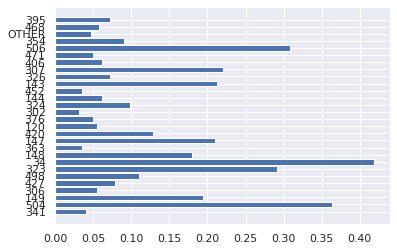

In [ ]:
bail_ = np.sum(df_bail.iloc[:,0:-1] , axis = 0)

bail_ = bail_[bail_>10]

list1 = bail_[bail_ != 0].index
# creating the Y Coordinate data as a python list
list2 = bail_[bail_ != 0]/344
# plotting the bar graph
plt.barh(list1, list2)
# displaying the bar graph
plt.show()

### b. Plotting All No Bail Files

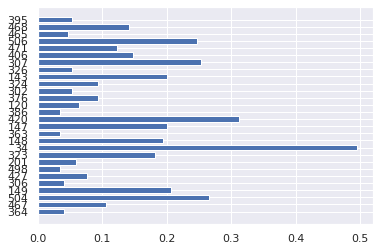

In [ ]:
nbail_ = np.sum(df_nobail.iloc[:,0:-1] , axis = 0)

nbail_ = nbail_[nbail_>5]

list1 = nbail_[nbail_ != 0].index
# creating the Y Coordinate data as a python list
list2 = nbail_[nbail_ != 0]/170
# plotting the bar graph
plt.barh(list1, list2)
# displaying the bar graph
plt.show()

In [ ]:
X_train.iloc[X_train.index<170].shape

(140, 146)

# E. Classifiers for Unbalanced Data

### a. Bernoulli Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### i. Fitting the Bernoulli Naive Bayes

In [ ]:
#Training the Naive Bayes model on the training set

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

#Let’s predict the test results
y_pred  =  classifier.predict(X_test)

#### ii. Result of Bernoulli Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score

# Confusion Matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

# Getting sum of all cases (test)
total1=sum(sum(cm1))

# From confusion matrix calculate different confusin matrix metrics

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[13 17]
 [10 63]]
Accuracy :  0.7378640776699029
Sensitivity :  0.863013698630137
Specificity :  0.43333333333333335
F-Score :  0.8235294117647058


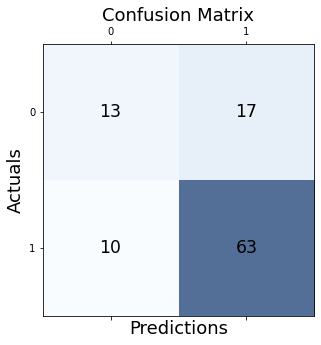

In [ ]:
# conf_matrix graph
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.7)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#### iii. Plot for Training Bail Files in Frequency Proportion

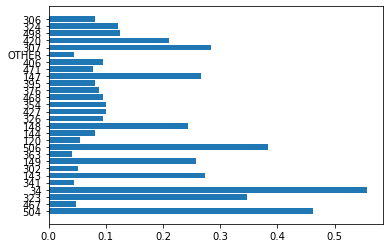

In [ ]:
tb = X_train[X_train.index>74]
tb = np.sum(tb, axis = 0)
tb = tb[tb>10] ## Frequency coming greater than 10
list1 = tb[tb != 0].index
# creating the Y Coordinate data as a python list
list2 = tb[tb != 0]
# plotting the bar graph
plt.barh(list1, list2/271)
# displaying the bar graph
plt.show()

#### iii. Plot for Training No Bail Files in Frequency Proportion

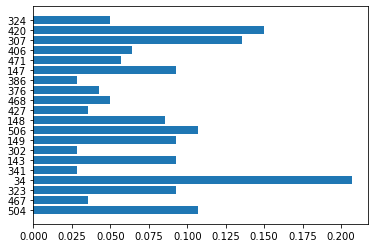

In [ ]:
tnb = X_train[X_train.index<=74]
tnb = np.sum(tnb, axis = 0)
tnb = tnb[tnb>3]
list1 = tnb[tnb != 0].index
# creating the Y Coordinate data as a python list
list2 = tnb[tnb != 0]
# plotting the bar graph
plt.barh(list1, list2/140)
# displaying the bar graph
plt.show()

### b. k-Nearest Neighbors Classifier

In [ ]:
# Importing Jaccard Distance for our Bernoulli Data
from scipy.spatial.distance import jaccard
# Importing k-NN Classifier from Scikit Learn
from sklearn.neighbors import KNeighborsClassifier
# Splitting the Unbalanced Data into 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### i. Selecting suitable number of k

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

Minimum error:- 0.2912621359223301 at K = 3


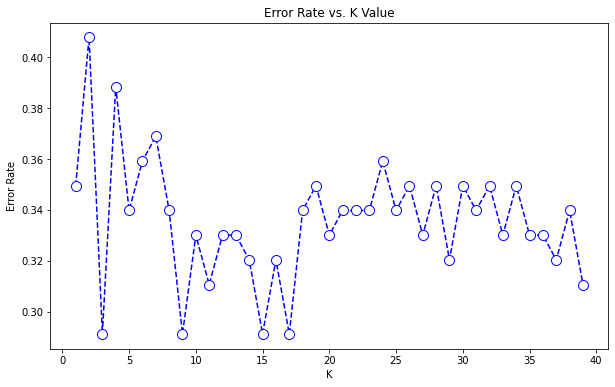

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,metric = "jaccard")
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

#### ii. Fitting k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'jaccard')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


#### iii.  Result of k-NN

In [ ]:
# Importing Confusion Matrix from Sklearn
from sklearn.metrics import confusion_matrix,f1_score

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[14 16]
 [14 59]]
Accuracy :  0.7087378640776699
Sensitivity :  0.8082191780821918
Specificity :  0.4666666666666667
F-Score :  0.7972972972972971


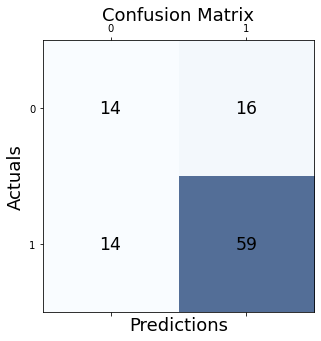

In [ ]:
# Confusion Matrix
conf_matrix = cm1
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### c. Logistic Regression

In [ ]:
X1 = X.copy()
#X1.drop(X.columns[X.sum(axis = 0) < 3] , axis = 1)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

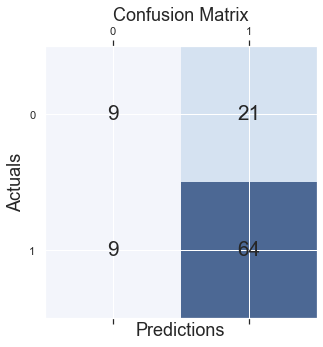

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
accuracy_score(y_test, y_pred)

0.7087378640776699

In [ ]:
import pandas as pd
X = pd.read_csv("IPC_Dataset.csv")

In [ ]:
y = X.iloc[:,-1]
X = X.iloc[:,0:-1]

### d. Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

#### i. Fitting Decision Tree

In [ ]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion = "entropy") #, max_depth = 5)
tree_clf = tree_clf.fit(X_train, y_train)

#### ii. Plotting the Decision Tree

[Ellipsis]

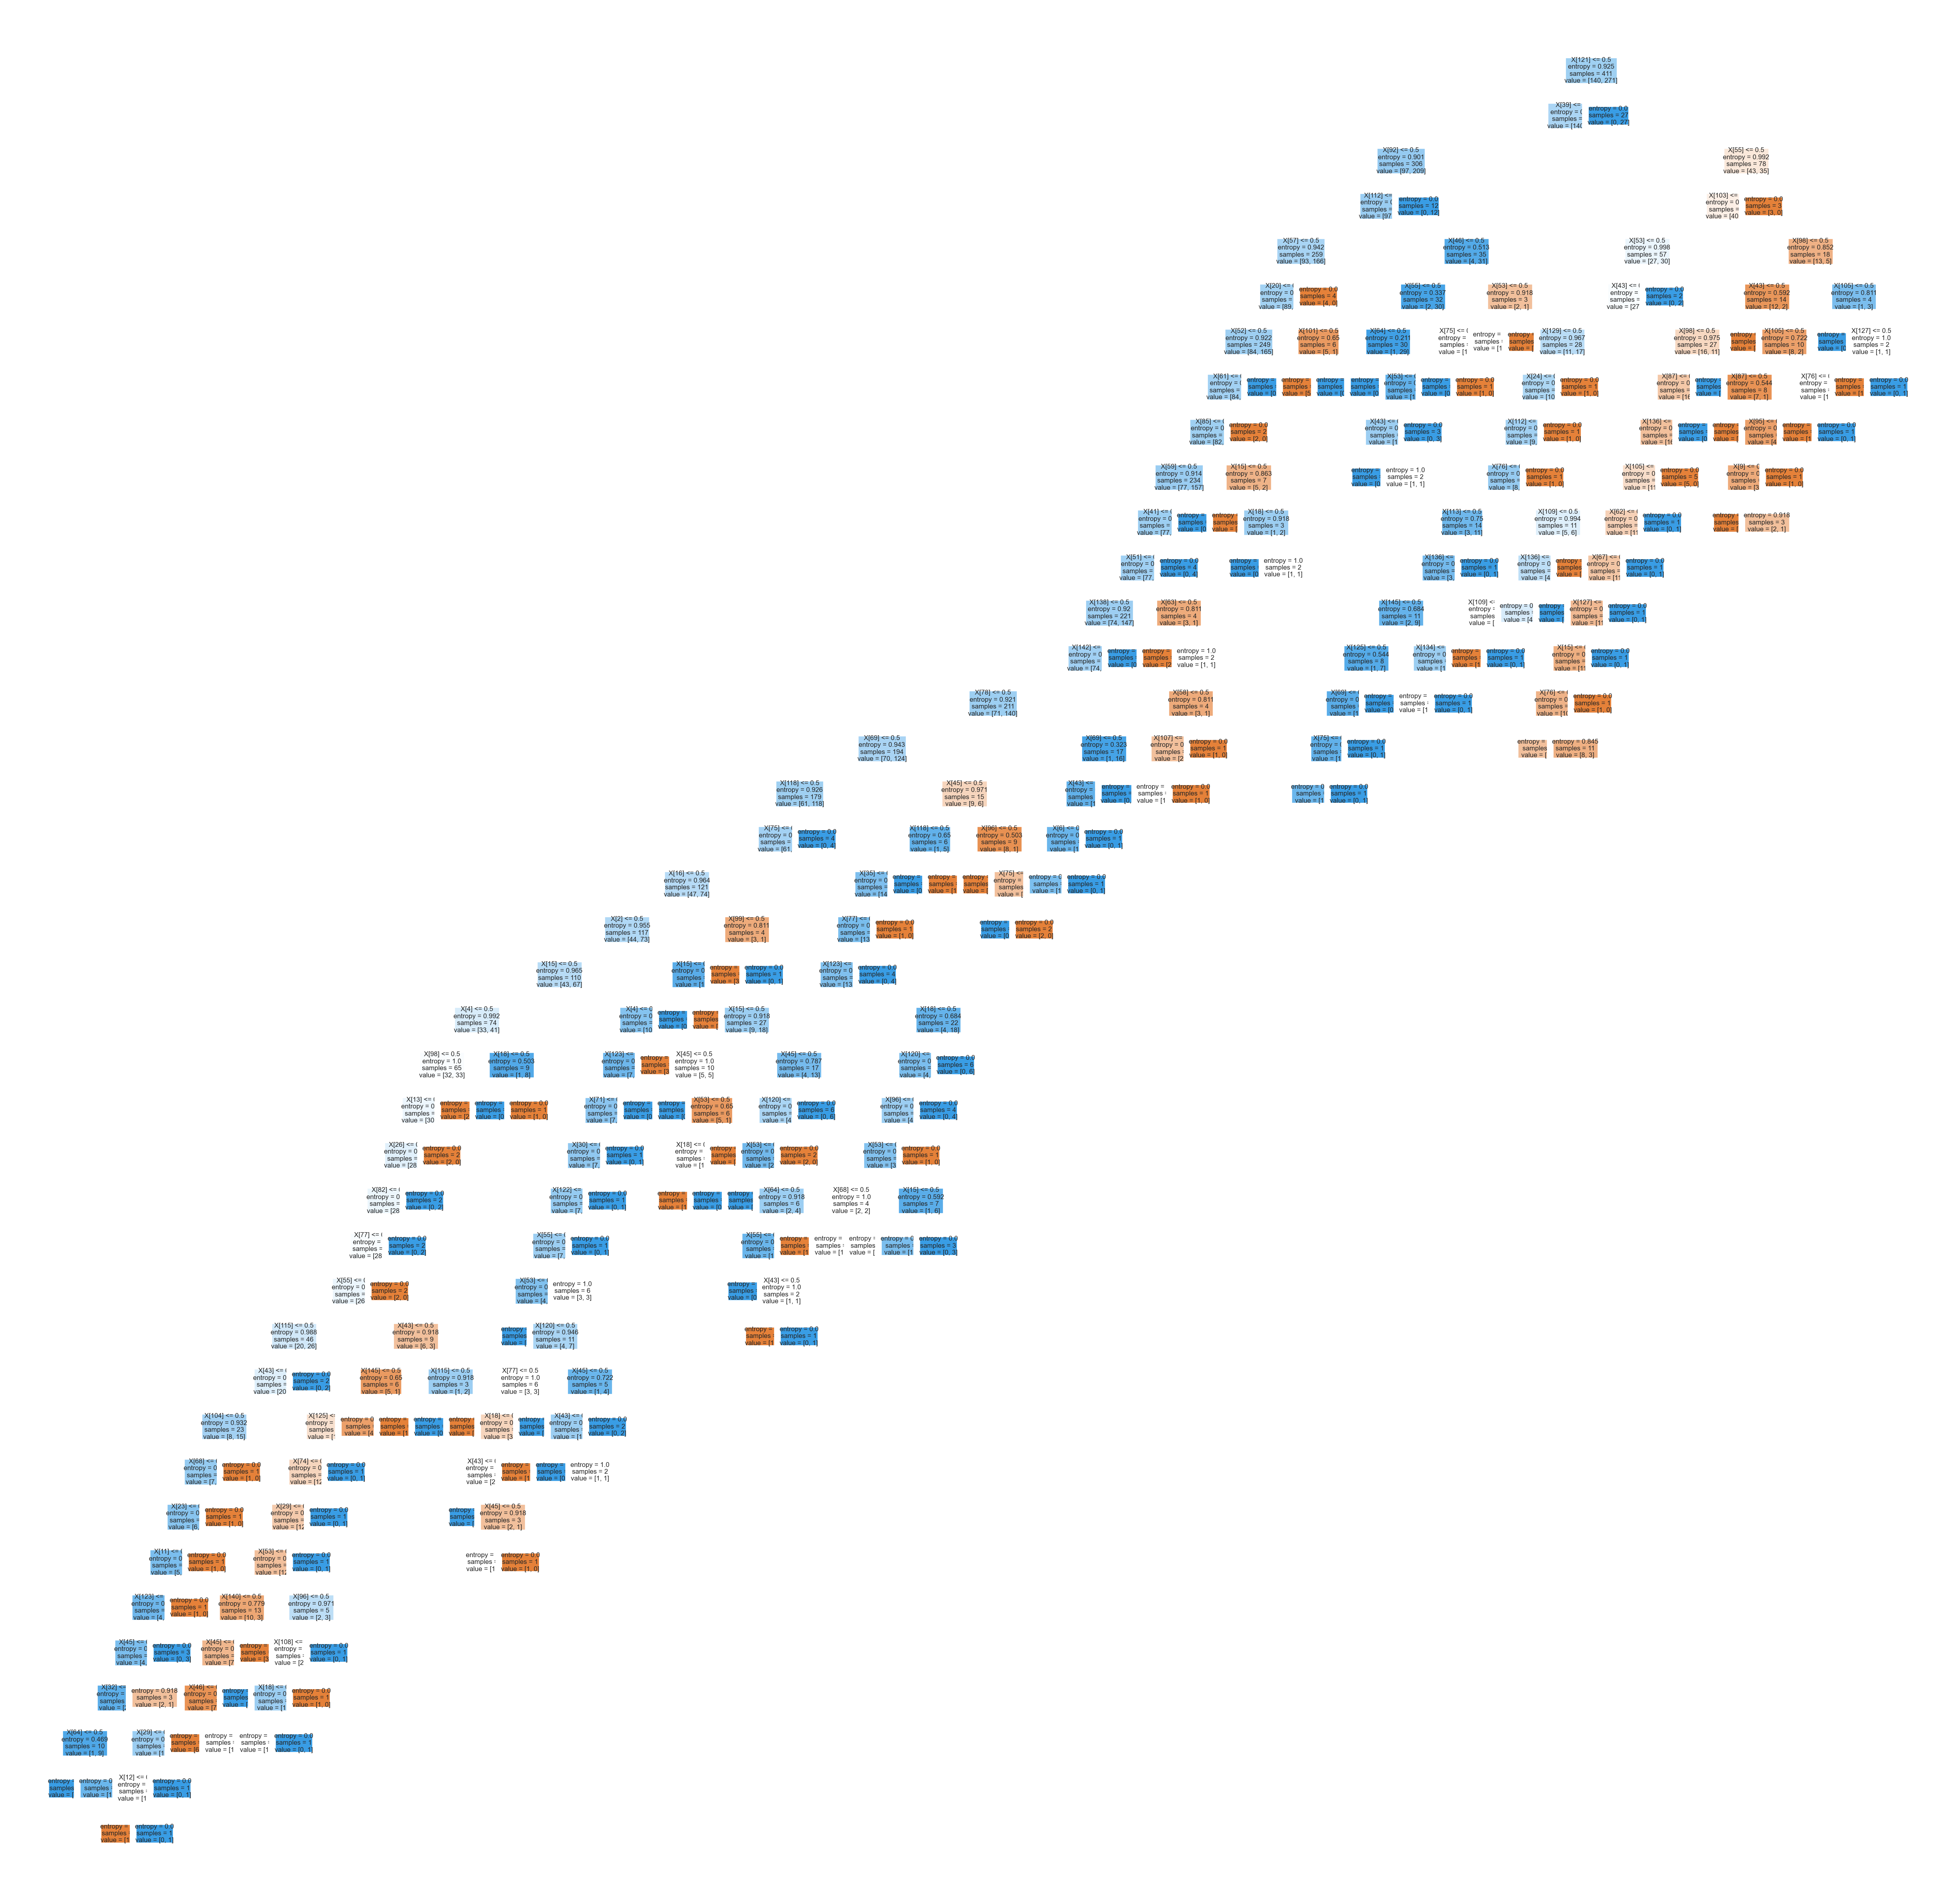

In [ ]:
#plot = tree.plot_tree(clf,figsize=(10,10))
#plot.figure(figsize=(10,10))
from matplotlib import pyplot as plt
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5),dpi = 1200)
tree.plot_tree(tree_clf , filled = True)
[...]

In [ ]:
y_pred = tree_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[16, 14],
       [17, 56]])

In [ ]:
ac

0.6990291262135923

#### iii. Cost Complexity Pruning for getting 'best' alpha value

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree

In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train , y_train)
alphas = path["ccp_alphas"]
#alphas

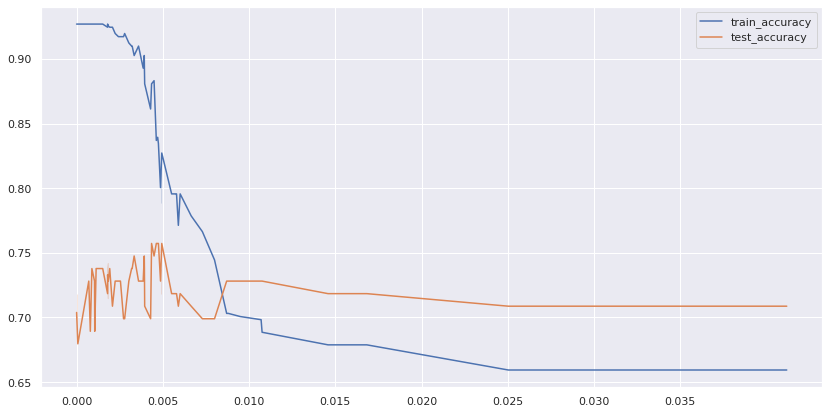

In [ ]:
accuracy_train,accuracy_test = [],[]
for i in alphas :
    tree_clf = tree.DecisionTreeClassifier(criterion = "entropy",ccp_alpha = i)
    tree_clf.fit(X_train,y_train)
    y_test_pred = tree_clf.predict(X_test)
    y_train_pred = tree_clf.predict(X_train)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train , x = alphas , label = "train_accuracy")
sns.lineplot(y=accuracy_test , x = alphas , label = "test_accuracy")
plt.xticks(ticks = np.arange(0,0.04,0.005))
plt.show()



#### iv. Fitting Decision Tree with the 'best' alpha value (tuning parameter)  

In [ ]:
t = tree.DecisionTreeClassifier(criterion = "entropy",ccp_alpha = 0.008)

#### v. Result for the Decision Tree with 'best' alpha value

In [ ]:
t.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy')

In [ ]:
y_pred = t.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[13, 17],
       [14, 59]])

In [ ]:
ac

0.7087378640776699

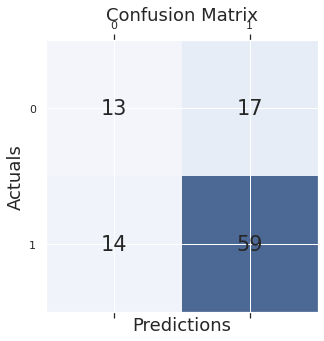

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### e. Neural Network (NN)

#### i. NN with Scikit Learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

NameError: ignored

In [ ]:
# Code for ANN

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(74, 37, 18, 9, 4, 2), activation random_state=0)
# clf = MLPClassifier(hidden_layer_sizes=(64, 34, 4), random_state=0)
clf.fit(X_train, y_train)

#Let’s predict the test results
y_pred  =  clf.predict(X_test)

from sklearn.metrics import confusion_matrix,f1_score

# Confusion Matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

# Getting sum of all cases (test)
total1=sum(sum(cm1))

# From confusion matrix calculate different confusin matrix metrics

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

In [ ]:
# Confusion Matrix
conf_matrix = cm1
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### ii. [NN with Keras to optimize the hidden layer](https://datagraphi.com/blog/post/2019/12/17/how-to-find-the-optimum-number-of-hidden-layers-and-nodes-in-a-neural-network-model)

###### 1. Importing the Libraries

In [ ]:
import pandas as pd
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### 2. Optimization to get best hyperparameters for NN

In [ ]:
# X= X.to_numpy()
# y = y.to_numpy()

# Function to linearly decrease or increase the number of nodes for the layers between the first layer and last layer

def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []

    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment

    return layers

# Function to vary the parameters of a tensor flow model by creating a new model based on given parameters

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))

    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'

    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False)

# Define the grid for searching the optimal parameters within the grid

activation_funcs = ['sigmoid', 'relu', 'tanh']
loss_funcs = ['binary_crossentropy','hinge']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100], epochs = [20,60])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].to_csv('GridOptimization.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


0.669902914762497
{'activation_func': 'sigmoid', 'batch_size': 100, 'epochs': 20, 'first_layer_nodes': 64, 'last_layer_nodes': 4, 'loss_func': 'binary_crossentropy', 'n_layers': 3}


In [ ]:
# Getting the optimized Hidden layer
FindLayerNodesLinear(3, 64, 4)

[64, 34, 4]

###### 3. [Fitting the Model](https://www.section.io/engineering-education/build-ann-with-keras/#:~:text=%23%20Initializing%20the%20ANN%20ann%20%3D%20tf.keras.models.Sequential%20%28%29,Add%20the%20output%20layer%20ann.add%20%28tf.keras.layers.Dense%20%28units%3D1%2C%20activation%3D%27sigmoid%27%29%29)
The Values are changing with running everytime we have to set a seed.

###### I. With Keras suggested NN architecture

In [ ]:
## building Model Optimized Hidden layers

# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Build the Artificial Neural Network
import tensorflow as tf
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units= 64, activation='sigmoid', input_dim = X_train.shape[1]))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=34, activation='sigmoid'))
# Add the third layer
ann.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## visualize the Artificial Neural Network
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

## Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6594
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6594
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6594
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6594
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6594
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6594
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6594
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6594
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6594
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6594
Epoch 11/

###### II.  With manually gotten optimized architecture

In [ ]:
## building Model Mechanically Optimized Hidden layers

# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Build the Artificial Neural Network
import tensorflow as tf
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units= 74, activation='relu', input_dim = X_train.shape[1]))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=37, activation='sigmoid'))
# Add the third layer
ann.add(tf.keras.layers.Dense(units=18, activation='sigmoid'))
# Add the fourth layer
ann.add(tf.keras.layers.Dense(units=9, activation='sigmoid'))
# Add the fifth layer
ann.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))
# Add the sixth layer
ann.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## (74, 37, 18, 9, 4, 2)
## visualize the Artificial Neural Network
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

## Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))



Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6679 - accuracy: 0.6594
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6594
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6594
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6594
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6594
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6594
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6594
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6594
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6594
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6594
Epoch 11/

###### III. To visualize the NN Architechture

In [ ]:
# ! pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz;
ann_viz(ann, title ="");

### Decision Tree for unbalanced data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_balanced.iloc[:,0:-1], X_balanced.iloc[:,-1], test_size=0.2, random_state=78)

from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion = "entropy" ,ccp_alpha = 0.005)
tree_clf = tree_clf.fit(X_train, y_train)

#plot = tree.plot_tree(clf,figsize=(10,10))
#plot.figure(figsize=(10,10))
#from matplotlib import pyplot as plt
#fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5),dpi = 1200)
#tree.plot_tree(tree_clf , filled = True)
#[...]



y_pred = tree_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

cm

ac

0.7463768115942029

In [ ]:
cm

array([[14, 16],
       [13, 60]], dtype=int64)

In [ ]:
### Preparing Data for the Resampling (concating X_train and y_train before running resampling)

# X_train_bs = pd.concat([X_train, y_train], axis = 1)
# X_train_nb = X_train_bs.loc[X_train_bs.index<170]
# X_train_b = X_train_bs.loc[X_train_bs.index>=170]
# X_train_b = X_train.loc[X_train.index>=170]
# X_test_bs = pd.concat([X_test, y_test], axis = 1)
# X_test_nb = X_test_bs.loc[X_test_bs.index<170]

# X_test_nb

In [ ]:
#X_train.loc[X_train.index>=170]

In [ ]:
# Resampling of all the data at the starting

# BootStrap_Sample_ = df.sample(345, replace = True, random_state = 9)

# BootStrap_Sample
# X_balanced = pd.concat([BootStrap_Sample , df_ipc_zo.iloc[170:, :]],axis = 0)

#X_balanced

### F. Resampling:

#### a. ***Over Sampling:***

In [ ]:
### Preparing Data for the Resampling (concating X_train and y_train before running resampling)

X_train_bs = pd.concat([X_train, y_train], axis = 1)
X_train_nb = X_train_bs.loc[X_train_bs.index<170]
# X_train_b = X_train_bs.loc[X_train_bs.index>=170]
# X_train_nb

In [ ]:
# Resampling of X_train,

# Resampling for the X_train
X_train_bs_nb = X_train_nb.sample(271, replace = True, random_state = 9)

# Concating the the resampled nb data with b data
a = pd.concat([X_train.loc[X_train.index>=170] , y_train.loc[X_train.index>=170]], axis=1)
X_train_bs_f = pd.concat([X_train_bs_nb, a], axis=0)

# Taking all the columns leaving label column
X_train_bs   = X_train_bs_f.iloc[:, 0:-1]

# Taking only the label column
y_train_bs   = X_train_bs_f.iloc[:,-1]

##### i. Classification with Over Sampling

###### 1. k-NN Classifier

Minimum error:- 0.3561643835616438 at K = 24


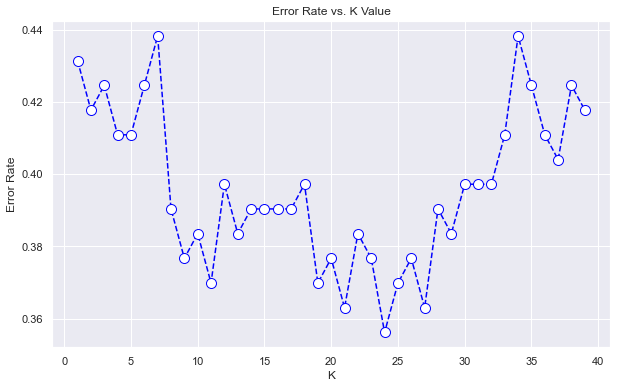

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,metric = "jaccard")
 knn.fit(X_train_bs,y_train_bs)
 pred_i = knn.predict(X_test_bs)
 error_rate.append(np.mean(pred_i != y_test_bs))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:
# K-NN OVERSAMPLED
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 24, metric = 'jaccard')
classifier.fit(X_train_bs, y_train_bs)

from sklearn.metrics import confusion_matrix,f1_score

y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[28  2]
 [42 31]]
Accuracy :  0.5728155339805825
Sensitivity :  0.4246575342465753
Specificity :  0.9333333333333333
F-Score :  0.5849056603773585


In [ ]:
#np.sum((X_train_bs.index>=170))

###### 2. Bernoulli Naive Bayes

In [ ]:
# Naive Bayes with oversampeled
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train_bs, y_train_bs)

#Let’s predict the test results
y_pred  =  classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,f1_score

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[16 14]
 [26 47]]
Accuracy :  0.6116504854368932
Sensitivity :  0.6438356164383562
Specificity :  0.5333333333333333
F-Score :  0.7014925373134328


###### 3. Neural network with Over Sampling:

In [ ]:
# # Concating the the resampled nb data with b data
# a = pd.concat([X_train.loc[X_train.index>=170] , y_train.loc[X_train.index>=170]], axis=1) # Bail Files
# X_train_bs_f = pd.concat([X_train_bs_nb, a], axis=0)

# # Taking all the columns leaving label column
# X_train_bs   = X_train_bs_f.iloc[:, 0:-1]
# # Taking only the label column
# y_train_bs   = X_train_bs_f.iloc[:,-1]

# X_overSampled = pd.concat([X_train_bs, X_test])
# y_overSampled = pd.concat([y_train_bs, y_test])
# X_overSampled ## The Size coming according to: Bail_train = 271, No_Bail_train = 271, Bail_test = 73, No_Bail_test = 30, sum= 645.

In [ ]:
import pandas as pd
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# X= X.to_numpy()
# y = y.to_numpy()

# Function to linearly decrease or increase the number of nodes for the layers between the first layer and last layer

def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []

    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment

    return layers

# Function to vary the parameters of a tensor flow model by creating a new model based on given parameters

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))

    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'

    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False)

# Define the grid for searching the optimal parameters within the grid

activation_funcs = ['sigmoid', 'relu', 'tanh']
loss_funcs = ['binary_crossentropy','hinge']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100], epochs = [20,60])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

grid.fit(X_overSampled,y_overSampled)

print(grid.best_score_)
print(grid.best_params_)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].to_csv('GridOptimizationOverSampled.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


0.686821711063385
{'activation_func': 'relu', 'batch_size': 100, 'epochs': 60, 'first_layer_nodes': 32, 'last_layer_nodes': 4, 'loss_func': 'hinge', 'n_layers': 3}


In [ ]:
FindLayerNodesLinear(3, 32, 4)

[32, 18, 4]

In [ ]:
## building Model Optimized Hidden layers

# split the dataset into train and test set

## Build the Artificial Neural Network
import tensorflow as tf
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units= 32, activation='sigmoid', input_dim = X_train_bs.shape[1]))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units= 18, activation='sigmoid'))
# Add the third layer
ann.add(tf.keras.layers.Dense(units= 4, activation='sigmoid'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

## visualize the Artificial Neural Network
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

## Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train_bs, y_train_bs, batch_size = 20, epochs = 100)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.9216 - accuracy: 0.5000
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.5000
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.5000
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.5000
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.5000
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5000
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5000
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 11/

#### b. ***Under Sampling:***

In [ ]:
## Bail Files (X & y)
X_b = df.iloc[170:, :]
X_b
## No Bail Files (X & y)
X_nb = df.iloc[:170, :]

## Selection of 170 files out of 344 Bail Files
X_bs_b = X_b.sample(170, replace = True, random_state = 9)

# Joining 170 randomly chosen files Bail file with other 170 No Bails
X_bs_us = pd.concat([X_nb, X_bs_b], axis=0)
#X_bs_us

##### i. Classification with Under Sampling

###### 1. k-NN Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_bs_us.iloc[:,0:-1], X_bs_us.iloc[:,-1], test_size=0.2, random_state=78)


Minimum error:- 0.2647058823529412 at K = 3


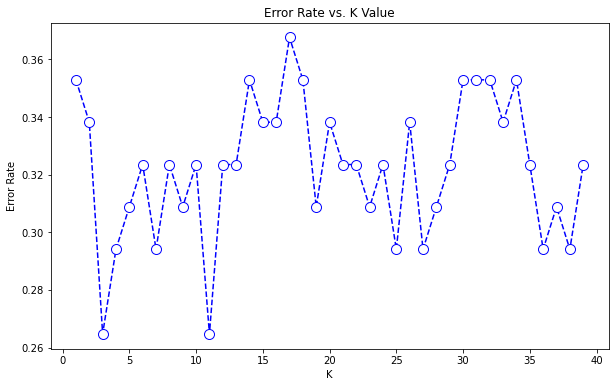

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,metric = "jaccard")
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='white', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'jaccard')
classifier.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix,f1_score

y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[25  4]
 [14 25]]
Accuracy :  0.7352941176470589
Sensitivity :  0.6410256410256411
Specificity :  0.8620689655172413
F-Score :  0.7352941176470588


###### 2. Bernoulli Naive Bayes

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training the Naive Bayes model on the training set

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

#Let’s predict the test results
y_pred  =  classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,f1_score

# Confusion Matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

# Getting sum of all cases (test)
total1=sum(sum(cm1))

# From confusion matrix calculate different confusin matrix metrics

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[19 10]
 [13 26]]
Accuracy :  0.6617647058823529
Sensitivity :  0.6666666666666666
Specificity :  0.6551724137931034
F-Score :  0.6933333333333334


### Over Sampling and ANN

## Creation of Over Samples

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

,341,343,364,328,512,353,411,405,366,494,...,212,336,511,304,463,181,468,172,395,313
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Resampling of X_train,

# Resampling for the X_train
X_train_bs_nb = X_train_nb.sample(271, replace = True, random_state = 9)

## Random Forest(Bagging)

# New Section

In [ ]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.680 (0.064)


In [ ]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

#Let’s predict the test results
y_pred  =  model.predict(X_test)

from sklearn.metrics import confusion_matrix,f1_score

# Confusion Matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

# Getting sum of all cases (test)
total1=sum(sum(cm1))

# From confusion matrix calculate different confusin matrix metrics

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

FScore= f1_score(y_test, y_pred)
print('F-Score : ', FScore)

Confusion Matrix : 
 [[17 13]
 [20 53]]
Accuracy :  0.6796116504854369
Sensitivity :  0.726027397260274
Specificity :  0.5666666666666667
F-Score :  0.7625899280575539
